In [3]:
# 훈련데이터가 한번에 준비되는 것이 아니라 조금씩 전달되는 상황
# 확률적 경사 하강법 사용 -> 한번에 데이터를 모두 다 사용하는것이 아니라 조금씩 학습하여 진행하는 점진적 학습 알고리즘

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [9]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [15]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_output = fish['Species'].to_numpy()

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_output, random_state = 42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()

In [25]:
ss.fit(train_input)

StandardScaler()

In [27]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [29]:
train_scaled

array([[ 9.19657820e-01,  6.09431747e-01,  8.10412209e-01,
         1.85194896e+00,  1.00075672e+00],
       [ 3.00412188e-01,  1.54653445e+00,  1.45316551e+00,
        -4.69816625e-01,  2.72917446e-01],
       [-1.08585360e+00, -1.68646987e+00, -1.70848587e+00,
        -1.70159849e+00, -2.00447580e+00],
       [-7.97341433e-01, -6.08801762e-01, -6.74869070e-01,
        -8.24805885e-01, -2.76314705e-01],
       [-7.12898847e-01, -7.30625113e-01, -7.00926637e-01,
        -8.02298036e-02, -7.03386897e-01],
       [-9.12746301e-01, -9.64900787e-01, -9.52816444e-01,
        -8.80171862e-01, -9.91535662e-01],
       [-7.97341433e-01, -7.02512032e-01, -7.61727625e-01,
        -7.82824547e-01, -5.44530184e-01],
       [ 6.38182533e-01,  5.62576612e-01,  7.32239510e-01,
         1.64473401e+00,  5.07057367e-01],
       [-7.41046376e-01, -6.74398951e-01, -7.35670058e-01,
        -6.12059278e-01, -5.57331377e-01],
       [-8.67710255e-01, -7.96222301e-01, -8.92015456e-01,
        -9.33586942e-01

In [33]:
from sklearn.linear_model import SGDClassifier

In [39]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)
# 로지스틱 손실 함수, max_iter = 수행 에포크 회수 -> 전체 훈련 세트를 10번 반복

In [41]:
sc.fit(train_scaled, train_target)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [43]:
sc.score(train_scaled, train_target)

0.773109243697479

In [47]:
sc.score(test_scaled, test_target)

0.775

In [49]:
# 과소적합 -> 반복횟수 더 늘리기
# partial_fit(): sc 객체를 다시 만들지 않고 이어서 학습 가능, 호출할때마다 1에폭씩 이어서 학습
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [51]:
sc.score(train_scaled, train_target)

0.8151260504201681

In [53]:
sc.score(test_scaled, test_target)

0.85

#### 과대적합, 과소적합을 방지하기 위해 적절한 에폭수 찾기

In [56]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)

In [62]:
train_score = []
test_score = []
classes = np.unique(train_target) # 전체 데이터의 모든 클래스 정로블 partial_fit() 메서드에 전달해 줘야 함
# 부분 데이터를 사용해 학습하기 때문에 클래스가 누락되는 경우가 있을 수 있기 때문에 class 전달 필요

In [68]:
# 300번의 에폭동안 훈련을 반복 진행
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

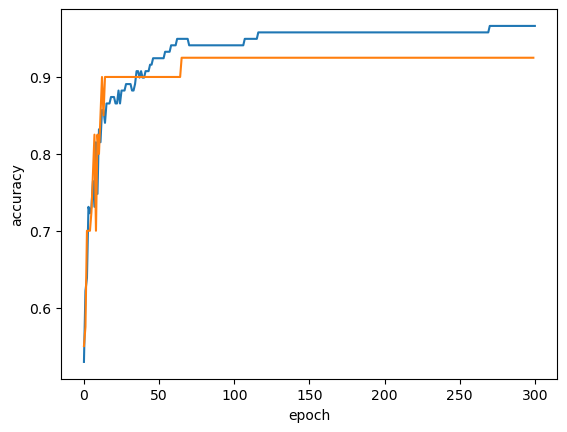

In [70]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [74]:
# 100 번쨰 에폭 이후부터 훈련세트와 테스트 세트의 점수가 벌어지고 있음 -> 훈련 데이터에 과도적합 되간다
# 따라서 적절한 에폭 수느 100
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, tol=None, random_state = 42) 
# tol = None을 사용하여 자동으로 멈추지 않고 100번까지 학습을 하게 함

In [76]:
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42, tol=None)

In [78]:
sc.score(train_scaled, train_target)

0.957983193277311

In [80]:
sc.score(test_scaled, test_target)

0.925

In [82]:
# 참고: 힌지 손실 함수를 사용하여 학습
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol=None, random_state = 42) 

In [84]:
sc.fit(train_scaled, train_target)

SGDClassifier(max_iter=100, random_state=42, tol=None)

In [86]:
sc.score(train_scaled, train_target)

0.9495798319327731

In [88]:
sc.score(test_scaled, test_target)

0.925